   BARLEY AREA (1000 ha)    Year precipitaion(cm)  IRRIGATION(Mha)  \
0                1689.41  1966.0              103            28.00   
1                1726.90  1967.0            111.5            29.25   
2                1528.89  1968.0            101.9            30.50   
3                1659.85  1969.0            109.2            31.75   
4                1879.32  1970.0            125.3            33.00   

   MECHANISATION COEF.  AGRICULTURE BUDGET  Barley yield last year  
0                 2.97              2254.0                 2645.86  
1                 4.00              2366.0                 2781.57  
2                 5.03              2582.0                 3294.85  
3                 6.06              3052.0                 2708.88  
4                 7.09              3455.0                 2628.55  
Mean Squared Error: 18605.732117691605
R-squared Score: 0.9695866504825875
year original predicted based on previous data
1966 2781.57     [2767.37124961]
1967 3294.

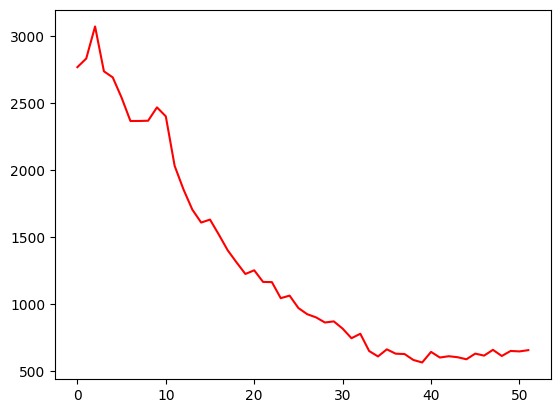

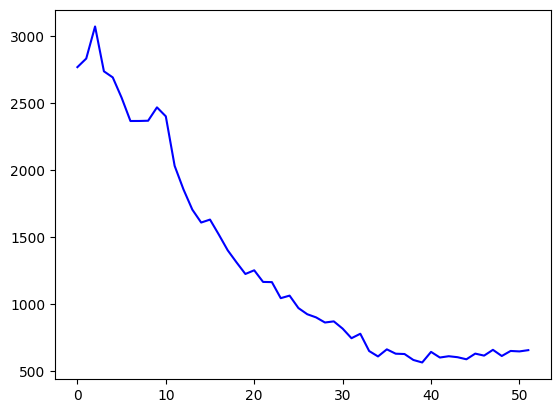

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Load your data into a pandas DataFrame
# Assuming your DataFrame is named 'df' and contains features and continuous target variable

# Example data (replace this with your actual data loading code)

df = pd.read_excel('chickpea_produce.xlsx')
df=df.dropna()
# Define features and target variable
X, y = df.drop('CHICKPEA YIELD ', axis=1), df[['CHICKPEA YIELD ']]
print(X.head())

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression
degree = 1  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X)
X_test_poly = poly_features.transform(X)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_poly, y)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

list_given=y['CHICKPEA YIELD ']
avg=0
print('year' , 'original' , 'predicted based on previous data')
for el in range(len(list_given)):
    print(1966+el,list_given[el], "   ", y_pred[el])
    avg+=(list_given[el]-y_pred[el])**2
print((avg/51)**(1/2))

plt.plot(y_pred,color='red')
plt.show()
plt.plot(y_pred,color='blue')
plt.show()

